# CLASIFICAR ggF y VBF CON MACHINE LEARNING

## PAQUETES

In [3]:
# dataframes 
import numpy as np
import pandas as pd

# cargar archivos
import uproot
from tqdm import tqdm # sirve para ver la linea de carga al cargar los archivos
import sys
import yaml

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# funcion de xgboost que clasifica
from xgboost import XGBClassifier

# graficar el arbol de desiciones del modelo, rcparams es para que se vea HD
from xgboost import plot_tree
from matplotlib.pylab import rcParams

# medir que tan bueno es el modelo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# funciones creadas
from lectura import *
from formulas import *
from cortes import *
from graficar import *

## MACHINE LEARNING

### XGBOOST

In [16]:
def do_classification(X_train, y_train):
    # aqui se hace el machine learning, creo un modelo y lo entreno
    modelo = XGBClassifier(learning_rate=0.05,
                          max_depth=6)
    modelo.fit(X_train, y_train)
    
    return modelo

### METRICAS

In [ ]:
# grafico las desiciones que tomo el arbol
def grafico_decisiones(modelo):
    rcParams['figure.figsize'] = 200,500
    plot_tree(modelo)
    plt.show()

def precision(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión del modelo: {accuracy * 100:.2f}%')

def grafico_confusion(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    matriz = confusion_matrix(y_test, y_pred)
    display_matriz = ConfusionMatrixDisplay(confusion_matrix=matriz)
    display_matriz.plot()
    plt.show()


# MAIN

In [7]:
########################################################
########### LECTURA DATOS PREVIOS YAML #################
########################################################

# cargar archivo yaml
path = "/home/tomilee/Desktop/Universidad/dark_photons/proyecto_investigacion/codigo/"
data_yaml = read_data_yaml('parametros.yaml')      #Parámetros del calo

# de data_yaml obtenemos los nombres de los datasets
vbf_data = data_yaml['VBF'].values() #esto devuelve solo los valores de cada variable.
ggf_data = data_yaml['ggF'].values() #esto devuelve solo los valores de cada variable.

# de data_yaml obtenemos los nombres de las variables
variables = data_yaml['recover_branches']
# de data_yaml obtenemos las escalas de las variables
scales = data_yaml['scale_variable']

# de data_yaml obtenemos los nombres de los cortes y los valores de los cortes menores y mayores
cuts = data_yaml['cuts']

In [8]:
########################################################
############# LECTURA DATOS ROOT FILES #################
########################################################
df_all = read_datasets(vbf_data, ggf_data, variables, scales, path)

100%|██████████| 9/9 [00:14<00:00,  1.64s/it]


In [9]:
df_all


njet30          mjj      detajj   
origin df_name                                                        
VBF    samples/VBF/frvz_vbf_500757       2  1316.194214    5.130603  \
       samples/VBF/frvz_vbf_500757       7  2287.880371    7.156201   
       samples/VBF/frvz_vbf_500757       2  1568.506470    6.255918   
       samples/VBF/frvz_vbf_500757       4   471.740875    1.960242   
       samples/VBF/frvz_vbf_500757       8  1150.059692    4.557185   
...                                    ...          ...         ...   
ggF    samples/ggF/frvz_ggf_508893       1    -0.999000 -999.000000   
       samples/ggF/frvz_ggf_508893       3   240.689178    1.942230   
       samples/ggF/frvz_ggf_508893       2   143.422470    2.548514   
       samples/ggF/frvz_ggf_508893       0    -0.999000 -999.000000   
       samples/ggF/frvz_ggf_508893       0    -0.999000 -999.000000   

                                        dphijj         MET  scale1fb   
origin df_name                                                         
VBF    samples/VBF/frvz_vbf_500757    1.032967  177.043106  0.000486  \
       samples/VBF/frvz_vbf_500757   -2.580441  101.195091  0.000502   
       samples/VBF/frvz_vbf_500757   -1.375577  130.909744  0.000429   
       samples/VBF/frvz_vbf_500757    2.980181  491.291687  0.000531   
       samples/VBF/frvz_vbf_500757    2.197970  115.439743  0.000014   
...                                        ...         ...       ...   
ggF    samples/ggF/frvz_ggf_508893 -999.000000   40.554482  0.028479   
       samples/ggF/frvz_ggf_508893    0.768057   76.802452  0.029882   
       samples/ggF/frvz_ggf_508893    2.000947   26.644657  0.029517   
       samples/ggF/frvz_ggf_508893 -999.000000   10.709071  0.029929   
       samples/ggF/frvz_ggf_508893 -999.000000   10.808948  0.030318   

                                      intLumi  
origin df_name                                 
VBF    samples/VBF/frvz_vbf_500757  44.299999  
       samples/VBF/frvz_vbf_500757  44.299999  
       samples/VBF/frvz_vbf_500757  44.299999  
       samples/VBF/frvz_vbf_500757  44.299999  
       samples/VBF/frvz_vbf_500757  44.299999  
...                                       ...  
ggF    samples/ggF/frvz_ggf_508893  58.450001  
       samples/ggF/frvz_ggf_508893  58.450001  
       samples/ggF/frvz_ggf_508893  58.450001  
       samples/ggF/frvz_ggf_508893  58.450001  
       samples/ggF/frvz_ggf_508893  58.450001  

[4628576 rows x 7 columns]

In [10]:
########################################################
####################### CORTES #########################
########################################################
# hago los cortes definitivos
df_all_cut = do_cuts(df_all, cuts, scales)

Numero eventos antes: 59024
Corte: njet30 entre [1, inf]
Numero eventos antes: 59024 



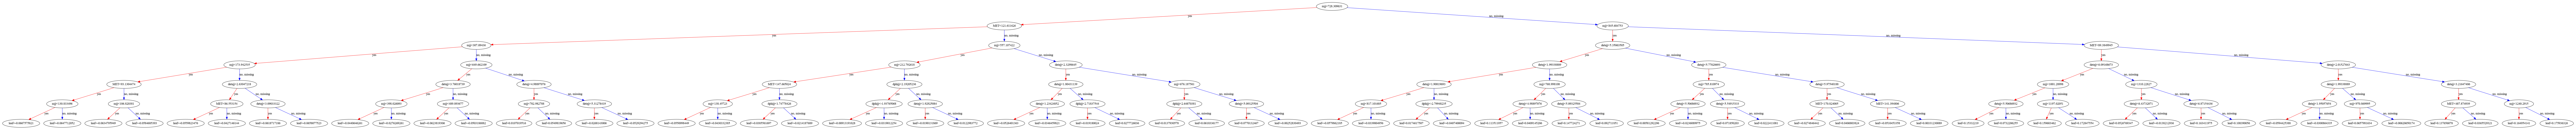

Precisión del modelo: 94.30%


In [17]:
########################################################
#################### CLASSIFICATION ####################
########################################################

# modifico df_all para aplicar ml
df_ml = df_all
df_ml = df_ml.droplevel('df_name')
df_ml = df_ml.drop(['njet30', 'scale1fb', 'intLumi'], axis=1)
df_ml = df_ml.reset_index(level='origin')
df_ml = pd.get_dummies(df_ml, columns=['origin'], dtype=int)

# separo entre datos de entrenamiento y datos de validacion
df_X = df_ml[["mjj", "detajj", "dphijj", "MET"]] # omito njet30, intlumi y scale1f
df_y = df_ml[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3)#, random_state=123)

In [ ]:
modelo = do_classification(X_train, y_train)

In [ ]:
grafico_decisiones(modelo)

In [ ]:
precision(modelo, X_test, y_test)

In [ ]:
grafico_confusion(modelo, X_test, y_test)

In [ ]:
# DESPUES PONER DATOS SET DE VALIDACION!
# crear funcion validacion()
# sirve para encontrar los hiperparámetros

In [13]:
df_ml[0]

,mjj,detajj,dphijj,MET,origin_VBF,origin_ggF
0,1316.194214,5.130603,1.032967,177.043106,1,0
1,2287.880371,7.156201,-2.580441,101.195091,1,0
2,1568.506470,6.255918,-1.375577,130.909744,1,0
3,471.740875,1.960242,2.980181,491.291687,1,0
4,1150.059692,4.557185,2.197970,115.439743,1,0
...,...,...,...,...,...,...
2012571,86.820213,0.779352,3.074377,36.471001,0,1
2012572,69.304848,0.293507,-2.302855,5.845552,0,1
2012573,506.555878,2.252506,-3.031298,27.214394,0,1
2012574,240.689178,1.942230,0.768057,76.802452,0,1
